In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

In [129]:
data=pd.read_csv('cdata.csv')
dataset=data.values
X = dataset[:,0:2]

# 實際資料

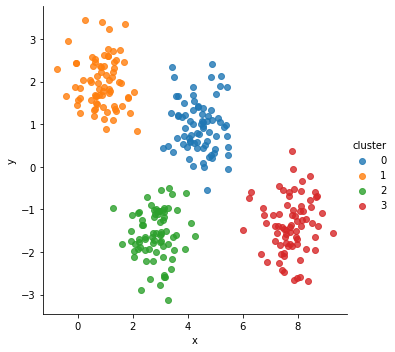

In [130]:
sns.lmplot("x", "y", data=data, hue="cluster", fit_reg=False)

# 第一題

## 隨機選取4個中心

In [131]:
#確認XY軸範圍
X_max=dataset[:,0:1].max()
X_min=dataset[:,0:1].min()
Y_max=dataset[:,1:2].max()
Y_min=dataset[:,1:2].min()

print(X_max,X_min,Y_max,Y_min)

9.2829 -0.7659 3.4376 -3.1224


In [132]:
#從範圍中隨機產生4個中心，設定random較好進行比較
centers=[]
random.seed(10)
for i in range(4):
    center=[]
    randX = random.uniform(X_min,X_max)
    randY = random.uniform(Y_min,Y_max)
    center.append(randX)
    center.append(randY)
    centers.append(center)
centers

[[4.976010393520003, -0.3088878013312475],
 [5.043223866840066, -1.7703955971648684],
 [7.407002590639438, 2.280343003819403],
 [5.800714798666135, -2.071294109236543]]

## 第一次分群

In [133]:
#計算各點和四個中心的距離，則最小者進行分群
cluster=[]#記錄分群結果(1、2、3、4)
for i in range(len(dataset)):
    dis=[] #紀錄與四個中心的距離
    for j in range(4):
        distance=((X[i][0]-centers[j][0])**2+(X[i][1]-centers[j][1])**2)**0.5
        dis.append(distance)
    #取得最小距離的index(0、1、2、3)
    min_index=dis.index(min(dis))
    #歸類進分群(1、2、3、4)
    cluster.append(min_index+1)

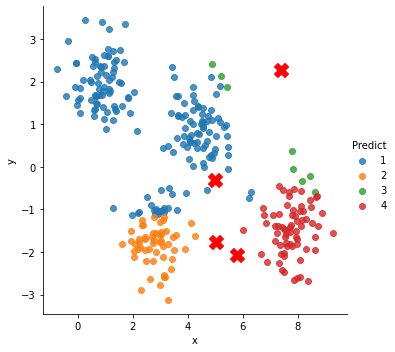

In [134]:
#繪出第一次分群結果
centers_a=np.array(centers)
data['Predict']=cluster #predict欄位為分群結果

#分群結果圖
sns.lmplot("x", "y", data=data, hue="Predict", fit_reg=False)

#中心點位置
plt.scatter(centers_a[:, 0], centers_a[:, 1], s=200,c="r",marker='X')
plt.show()

## 調整中心並重新分群

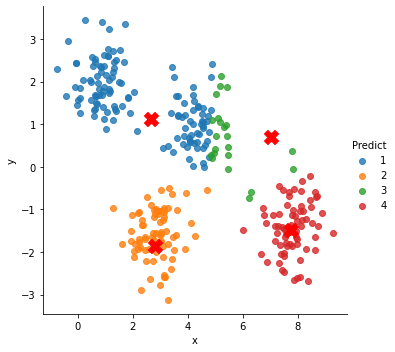

SSE: 398.03883480754445


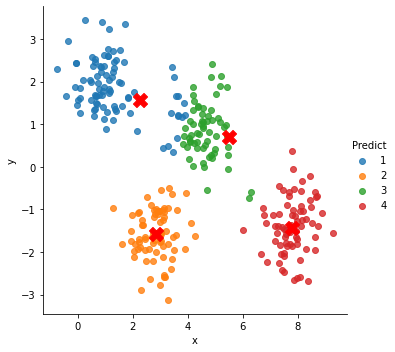

SSE: 318.72397084350933


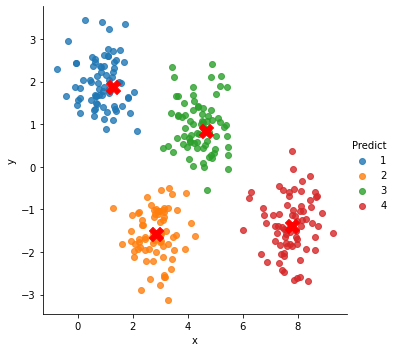

SSE: 233.3598013431129


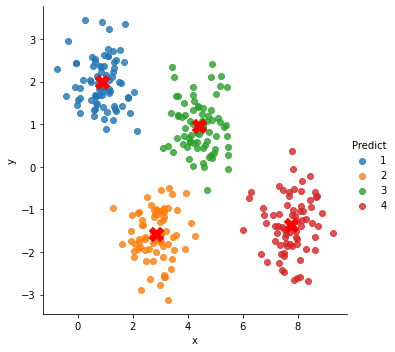

SSE: 222.89434544344437


In [135]:
SSE_old=float("inf") #紀錄前一輪的SSE，與當前輪SSE比較。一開始先設為無限大
while(True):
    # 記錄各分群座標
    centers=[]#紀錄中心位置
    SSE=0
    Xlist=X.tolist()
    
    #重新計算中心點，上次分群後的各群平均
    for j in range(1,5):
        center=[]
        cluster_temp=[] #暫存歸在一群的點
        for i in range(len(cluster)):
            if cluster[i]==j:
                cluster_temp.append(Xlist[i])
        cluster_temp=np.array(cluster_temp)

        #計算中心位置
        centerX=cluster_temp[:,0].mean()
        centerY=cluster_temp[:,1].mean()
        center.append(centerX)
        center.append(centerY)

        centers.append(center)

    #根據新的中心重新分群，並記錄下SSE
    cluster=[]#記錄分群結果
    for i in range(len(dataset)):
        dis=[]
        for j in range(4):
            distance=((X[i][0]-centers[j][0])**2+(X[i][1]-centers[j][1])**2)**0.5
            dis.append(distance)
        min_index=dis.index(min(dis))
        cluster.append(min_index+1)
        SSE=SSE+min(dis)#min(dis)為該點與其分群中心的距離 


    #如果當輪SSE沒有優於上輪，則表示上輪已為最佳結果結束迴圈    
    if SSE>=SSE_old:
        break
        
    
    centers_a=np.array(centers)
    data['Predict']=cluster
    sns.lmplot("x", "y", data=data, hue="Predict", fit_reg=False)
    plt.scatter(centers_a[:, 0], centers_a[:, 1], s=200,c="r",marker='X')
    plt.show()
    
    print("SSE:",SSE)
    
    SSE_old=SSE

# 第二題

In [136]:
SSE_list=[] #記錄不同k的SSE
k_list=[] #紀錄k

#計算k等於2~50的SSE 與第一題做法相同，只要記錄不同k之下的SSE進入SSE_list即可
for k in range(2,51):
    k_list.append(k)
    centers=[]
    random.seed(10)
    for i in range(k):
        center=[]
        randX = random.uniform(X_min,X_max)
        randY = random.uniform(Y_min,Y_max)
        center.append(randX)
        center.append(randY)
        centers.append(center)
        
    cluster=[]#記錄分群結果
    for i in range(len(dataset)):
        dis=[]
        for j in range(k):
            distance=((X[i][0]-centers[j][0])**2+(X[i][1]-centers[j][1])**2)**0.5
            dis.append(distance)
        min_index=dis.index(min(dis))
        cluster.append(min_index+1)
        
    SSE_old=float("inf")
    
    while(True):
        # 記錄各分群座標
        centers_ori=centers
        SSE=0
        centers=[]#紀錄中心位置
        Xlist=X.tolist()
        for j in range(1,k+1):
            center=[]
            cluster_temp=[]
            for i in range(len(cluster)):
                if cluster[i]==j:
                    cluster_temp.append(Xlist[i])
            cluster_temp=np.array(cluster_temp)

            if cluster_temp!=[]:
                centerX=cluster_temp[:,0].mean()
                centerY=cluster_temp[:,1].mean()

                center.append(centerX)
                center.append(centerY)

                centers.append(center)

            else:
                centers.append(centers_ori[j-1])


        cluster=[]#記錄分群結果
        for i in range(len(dataset)):
            dis=[]
            for j in range(k):
                distance=((X[i][0]-centers[j][0])**2+(X[i][1]-centers[j][1])**2)**0.5
                dis.append(distance)
            min_index=dis.index(min(dis))
            cluster.append(min_index+1)
            SSE=SSE+min(dis)


        if SSE>=SSE_old:
            SSE_list.append(SSE_old)
            break

       

        SSE_old=SSE

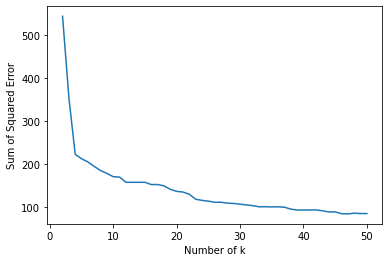

In [137]:
# 繪出折線圖
x=k_list
y=SSE_list

plt.xlabel('Number of k', fontsize="10")
plt.ylabel('Sum of Squared Error', fontsize="10")

plt.plot(x, y)

# 第三題

In [138]:
SSE_list=[]
round_list=[]
random.seed(10)

#固定k=10進行10次隨機選中心，繪出每次的SSE
for r in range(10):
    round_list.append(r)
    centers=[]
    SSE=0
    for i in range(10):
        center=[]
        randX = random.uniform(X_min,X_max)
        randY = random.uniform(Y_min,Y_max)
        center.append(randX)
        center.append(randY)
        centers.append(center)


    for i in range(len(dataset)):
        dis=[]
        for j in range(10):
            distance=((X[i][0]-centers[j][0])**2+(X[i][1]-centers[j][1])**2)**0.5
            dis.append(distance)
        min_index=dis.index(min(dis))
        cluster.append(min_index+1)
        SSE=SSE+min(dis)
        
    SSE_list.append(SSE)

<BarContainer object of 10 artists>

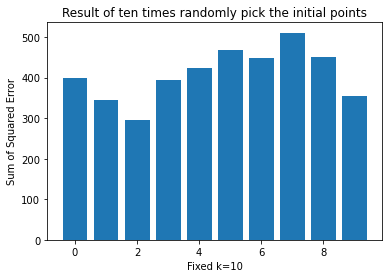

In [139]:
plt.xlabel('Fixed k=10', fontsize="10")
plt.ylabel('Sum of Squared Error', fontsize="10")
plt.title('Result of ten times randomly pick the initial points')
plt.bar(round_list, SSE_list, width=0.8)